<a href="https://colab.research.google.com/github/D6342/D1978/blob/main/P2_Linear_Regression_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Loss = 12.3294, W = 2.5466, b = -1.9059
Epoch 10: Loss = 0.2235, W = 3.3500, b = 0.1526
Epoch 20: Loss = 0.1413, W = 3.2214, b = 0.3579
Epoch 30: Loss = 0.1074, W = 3.0633, b = 0.4482
Epoch 40: Loss = 0.0818, W = 2.9232, b = 0.5217
Epoch 50: Loss = 0.0624, W = 2.8012, b = 0.5855
Epoch 60: Loss = 0.0477, W = 2.6950, b = 0.6409
Epoch 70: Loss = 0.0366, W = 2.6026, b = 0.6891
Epoch 80: Loss = 0.0282, W = 2.5222, b = 0.7310
Epoch 90: Loss = 0.0218, W = 2.4523, b = 0.7675


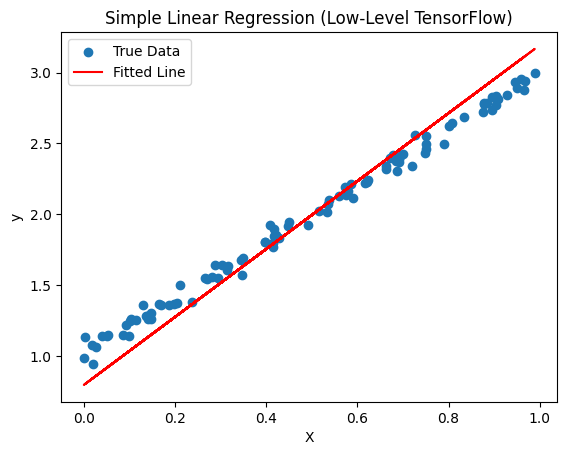

In [ ]:
# Practical 2a:	Implement a simple linear regression model using TensorFlow's low level API (or tf. keras).
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create synthetic data (y = 2x + 1 + noise)
np.random.seed(1)
X = np.random.rand(100).astype(np.float32)
y = 2 * X + 1 + np.random.normal(0, 0.05, size=100).astype(np.float32)

# Step 2: Initialize trainable variables (weight and bias)
W = tf.Variable(tf.random.normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

# Step 3: Set training parameters
learning_rate = 0.1
epochs = 100

# Step 4: Training loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = W * X + b
        loss = tf.reduce_mean(tf.square(y - y_pred))  # Mean Squared Error

    # Compute and apply gradients
    gradients = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.4f}, W = {W.numpy()[0]:.4f}, b = {b.numpy()[0]:.4f}")

# Step 5: Plot the results
plt.scatter(X, y, label='True Data')
plt.plot(X, W.numpy() * X + b.numpy(), color='red', label='Fitted Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression (Low-Level TensorFlow)')
plt.show()

Weight (slope): nan
Bias (intercept): nan


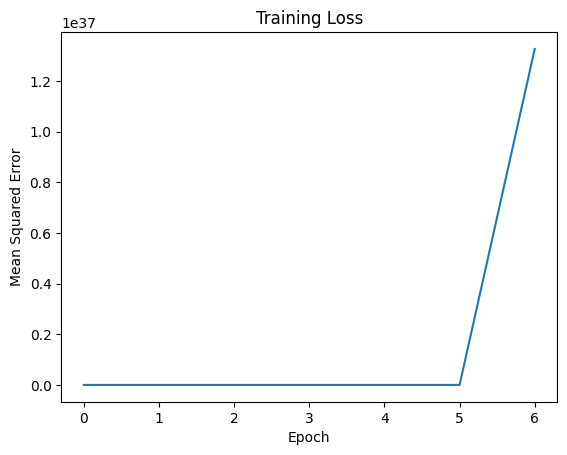

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


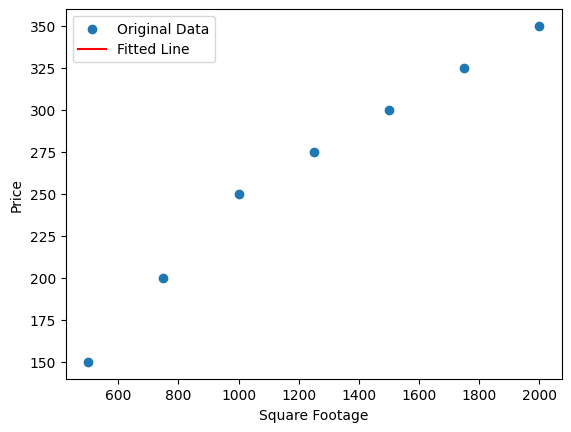

In [ ]:
# Practical 2b: Train the model on a toy dataset (e.g., housing prices vs. square footage)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create toy dataset
square_footage = np.array([500, 750, 1000, 1250, 1500, 1750, 2000], dtype=float)
price = np.array([150, 200, 250, 275, 300, 325, 350], dtype=float)

# Build and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the model
history = model.fit(square_footage, price, epochs=100, verbose=0)

# Print trained weights (slope and intercept)
weights = model.get_weights()
print(f"Weight (slope): {weights[0][0][0]:.4f}")
print(f"Bias (intercept): {weights[1][0]:.4f}")

# Plot training loss over epochs
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

# Optional: Plot predicted line vs data
predicted_price = model.predict(square_footage)
plt.scatter(square_footage, price, label='Original Data')
plt.plot(square_footage, predicted_price, color='red', label='Fitted Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 975.5814 - root_mean_squared_error: 31.1175  
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 563.6384 - root_mean_squared_error: 23.4202 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 524.2181 - root_mean_squared_error: 22.4693
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 487.1521 - root_mean_squared_error: 21.9522 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 235.2141 - root_mean_squared_error: 15.1947
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 168.8849 - root_mean_squared_error: 12.8288 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.8237 - root_mean_squared_error: 8.6216 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.1390 - root_mean_squared_error: 7.6616   
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.0983 - root_mean_squared_error: 4.4732
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.3269 - 

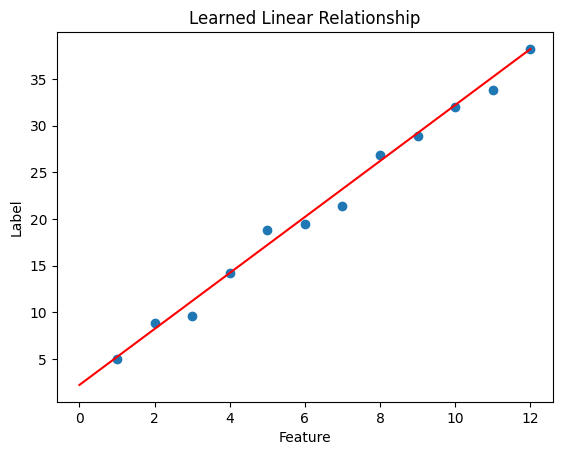

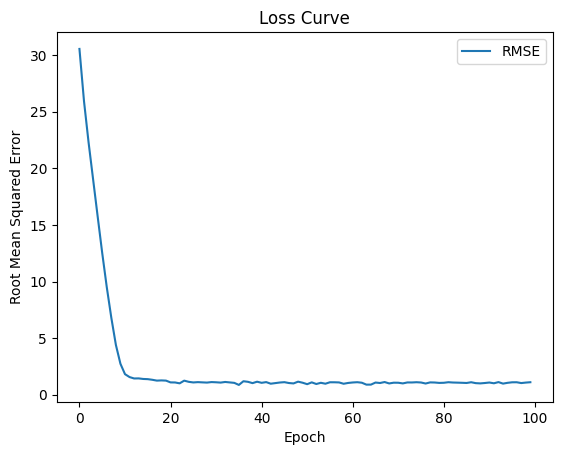

In [ ]:
# Practical 2c - Visualize the loss function and learned linear relationship
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Define model creation function
def build_model(learning_rate=0.05):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=(1,))
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                  loss='mean_squared_error',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Define training function
def train_model(model, feature, label, epochs=100, batch_size=1):
    history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)
    trained_weight = model.get_weights()[0][0][0]
    trained_bias = model.get_weights()[1][0]
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, history.epoch, rmse

# Plot functions
def plot_model(weight, bias, feature, label):
    plt.xlabel("Feature")
    plt.ylabel("Label")
    plt.scatter(feature, label)
    x0 = 0
    y0 = bias
    x1 = feature[-1]
    y1 = bias + weight * x1
    plt.plot([x0, x1], [y0, y1], c='r')
    plt.title("Learned Linear Relationship")
    plt.show()

def plot_loss_curve(epochs, rmse):
    plt.plot(epochs, rmse, label="RMSE")
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.legend()
    plt.title("Loss Curve")
    plt.show()

# Data
my_feature = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label = np.array([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

model = build_model()
weight, bias, epochs, rmse = train_model(model, my_feature, my_label)
plot_model(weight, bias, my_feature, my_label)
plot_loss_curve(epochs, rmse)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(units=2, activation="relu", input_dim=2))
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model with metrics in list format
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Input data for XOR
X = np.array([[0.0, 0.0],
              [0.0, 1.0],
              [1.0, 0.0],
              [1.0, 1.0]])
print("Input data:")
print(X)

# Labels (XOR output)
y = np.array([0.0, 1.0, 1.0, 0.0])
print("\nTarget labels:")
print(y)

# Train the model
model.fit(X, y, epochs=500, verbose=0)

# Make predictions
predictions = model.predict(X)
print("\nPredictions after training:")
print(predictions)

Input data:
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

Target labels:
[0. 1. 1. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Predictions after training:
[[0.5716794 ]
 [0.46599868]
 [0.5715805 ]
 [0.36315057]]
